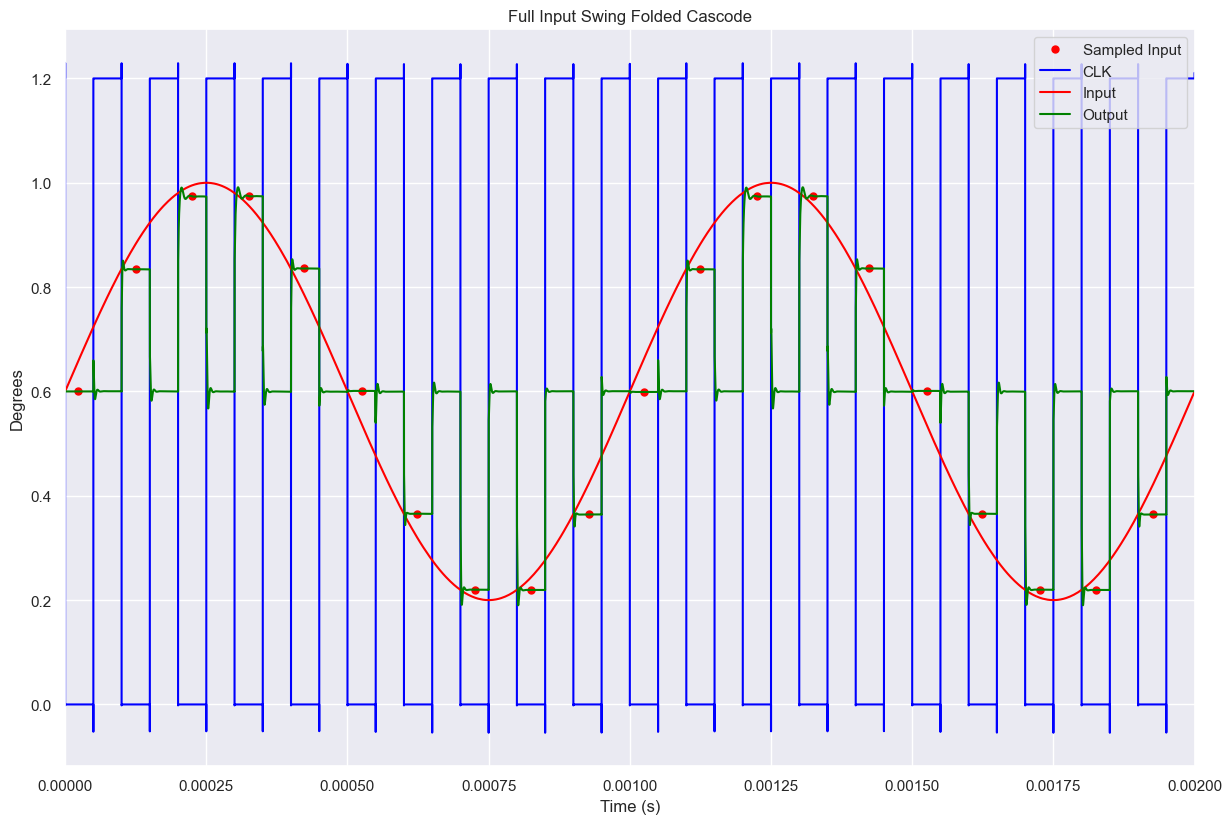

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib.ticker

dir = "amplifiers"
filename = "sample_hold_10cycles.csv"
data = pd.read_csv(os.path.join(dir, filename))

# set theme and figure size
sns.set_theme(style="darkgrid", palette='tab10', rc={'figure.figsize':(15,6)})
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)

t           = data["v /net1; tran (V) X"]
clk         = data["v /clk; tran (V) Y"]
sig         = data["v /net1; tran (V) Y"]
out         = data["v /VOUT; tran (V) Y"]

sample_t = np.arange(0, 0.002, 0.0001) + 0.0001/4
t_ind = []
for st in sample_t:
    st_fit = t[min(range(len(t)), key = lambda i: abs(t[i]-st))]
    t_ind.append(np.where(t == st_fit)[0][0])
    
ax.plot(t[t_ind], out[t_ind], 'o', color='red', label='Sampled Input', markersize=5)

ax.plot(t, clk, label="CLK", color="blue")
ax.plot(t, sig, label="Input", color="red")
ax.plot(t, out, label="Output", color="green")

fig.tight_layout()

ax.grid(True)
ax.legend(loc="upper right")
plt.title('Full Input Swing Folded Cascode')
plt.xlabel('Time (s)')
plt.ylabel('Degrees')
plt.xlim(0, 0.002)
plt.show()


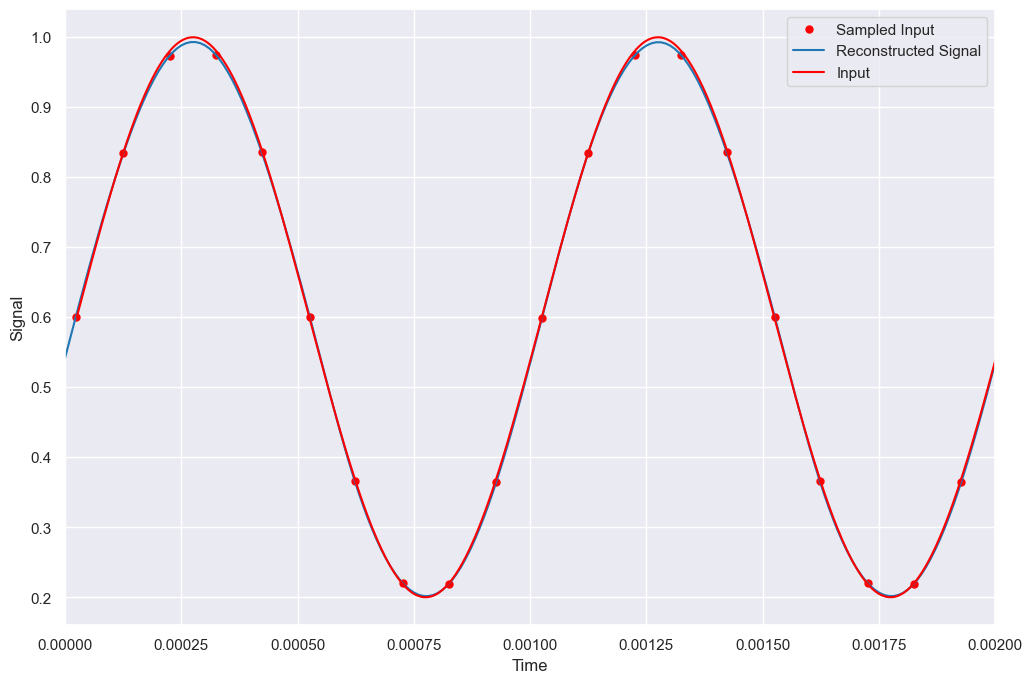

Total Harmonic Distortion (THD): 1.0002066106904428


In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy.interpolate import CubicSpline

dir = "amplifiers"
filename = "sample_hold_10cycles.csv"
data = pd.read_csv(os.path.join(dir, filename))

sns.set_theme(style="darkgrid", palette='tab10', rc={'figure.figsize':(15,6)})
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)

t = data["v /net1; tran (V) X"]
out = data["v /VOUT; tran (V) Y"]

# Sample points
sample_t = np.arange(0, 0.01, 0.0001) + 0.0001/4
t_ind = []
for st in sample_t:
    st_fit = t[min(range(len(t)), key=lambda i: abs(t[i] - st))]
    t_ind.append(np.where(t == st_fit)[0][0])

# Plot sampled points
ax.plot(t[t_ind], out[t_ind], 'o', color='red', label='Sampled Input', markersize=5)

# Perform interpolation
cs = CubicSpline(t[t_ind], out[t_ind])
interp_t = np.linspace(min(t), max(t), 1000)
interp_out = cs(interp_t)

# Plot reconstructed signal
Ts = 0.0001
ax.plot(interp_t, interp_out, label='Reconstructed Signal')
ax.plot(t+Ts/4, sig, label="Input", color="red")

# Customize plot
ax.set_xlabel('Time')
ax.set_ylabel('Signal')
ax.legend()
plt.xlim(0, 0.002)
plt.show()

# Calculate THD
f_signal = 1000  # Hz
# Compute the Fourier transform of the reconstructed signal
fft_reconstructed = np.fft.fft(interp_out)
n = len(interp_out)
freq = np.fft.fftfreq(n, d=(interp_t[1] - interp_t[0]))
freq_pos = freq[:n // 2]  # Only positive frequencies

# Find the index corresponding to the fundamental frequency
fundamental_index = np.argmin(np.abs(freq_pos - f_signal))

# Calculate THD
harmonic_magnitudes = np.abs(fft_reconstructed[1:n // 2])  # Exclude DC component
fundamental_magnitude = np.abs(fft_reconstructed[fundamental_index])
total_harmonic_magnitude_squared = np.sum(harmonic_magnitudes ** 2)
thd = np.sqrt(total_harmonic_magnitude_squared) / fundamental_magnitude

print("Total Harmonic Distortion (THD):", thd)


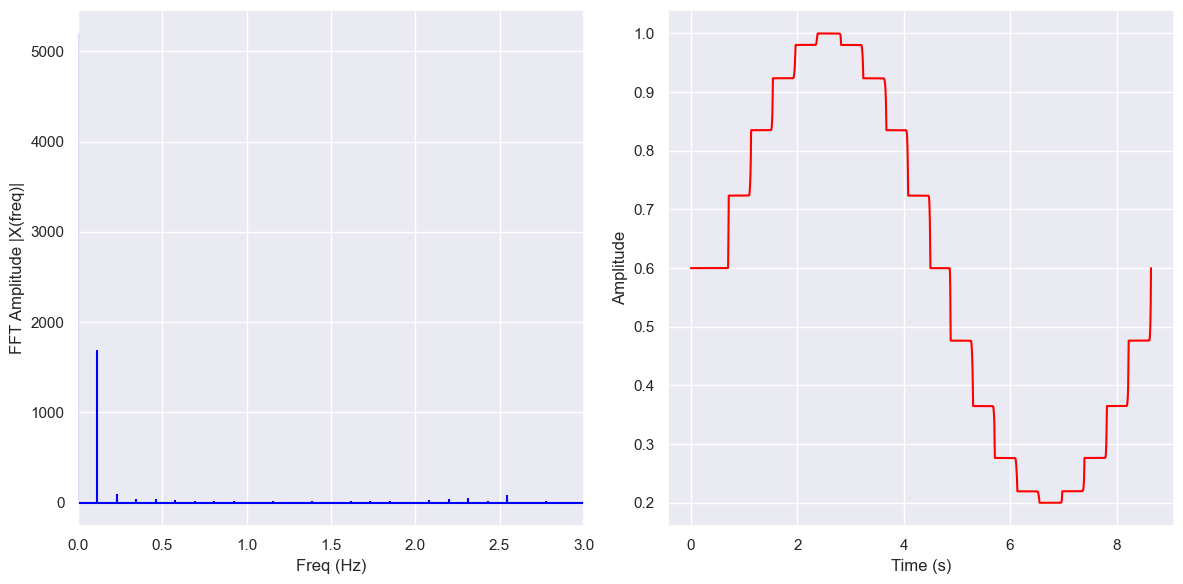

In [10]:
from numpy.fft import fft, ifft

x = sig
sr = 1000
ts = 1/sr
t = np.arange(0, len(x)*ts, ts)

X = fft(x)
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T 

plt.figure(figsize = (12, 6))
plt.subplot(121)

plt.stem(freq, np.abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(0, 3)

plt.subplot(122)
plt.plot(t, ifft(X), 'r')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()